In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import os

In [2]:
# Get the current working directory
current_directory = os.getcwd()
print("Current directory:", current_directory)

# Move one directory up
parent_directory = os.path.abspath(os.path.join(current_directory, ".."))

file_path=os.path.join(parent_directory,"marketing_campaign.csv")

Current directory: d:\Resume_Projects\Clustering\Notebook\EDA


In [3]:
import pandas as pd

df = pd.read_csv(r"D:\Resume_Projects\Clustering\Notebook\marketing_campaign.csv", sep="\t")


In [4]:
df.shape

(2240, 29)

In [5]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


# Data Overview

### Personal Details
- **ID:** Customer identifier.
- **Year_Birth:** Year of birth of the customer.
- **Education:** Educational qualification of the customer.
- **Marital_Status:** Marital status of the customer.
- **Income:** Income level of the customer.
- **Kidhome:** Number of children in the household aged 0 to 5.
- **Teenhome:** Number of teenagers in the household aged 12 to 18.
- **Dt_Customer:** Date when the customer was enrolled.

### Products
- **Recency:** Recency of the customer's last purchase.
- **MntWines:** Amount spent on wines.
- **MntFruits:** Amount spent on fruits.
- **MntMeatProducts:** Amount spent on meat products.
- **MntFishProducts:** Amount spent on fish products.
- **MntSweetProducts:** Amount spent on sweet products.
- **MntGoldProds:** Amount spent on gold products.

### Purchases
- **NumDealsPurchases:** Number of purchases made with a discount or deal.
- **NumWebPurchases:** Number of purchases made through the website.
- **NumCatalogPurchases:** Number of purchases made through catalogs.
- **NumStorePurchases:** Number of purchases made in physical stores.

### Campaign Details
- **NumWebVisitsMonth:** Number of web visits in a month.
- **AcceptedCmp3, AcceptedCmp4, AcceptedCmp5, AcceptedCmp1, AcceptedCmp2:** Acceptance of different marketing campaigns.
- **Complain:** Customer complaint status.
- **Z_CostContact:** Cost of contacting the customer.
- **Z_Revenue:** Revenue generated from contacting the customer.
- **Response:** Customer response to marketing campaigns.


##### Data Overview

In [6]:
df.shape

(2240, 29)

In [7]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

In [8]:
# Renaming the specified columns
column_mapping = {'MntWines': 'Wines',
                  'MntFruits': 'Fruits',
                  'MntMeatProducts': 'Meat',
                  'MntFishProducts': 'Fish',
                  'MntSweetProducts': 'Sweet',
                  'MntGoldProds': 'Gold',
                  'NumDealsPurchases': 'DealsPurchases',
                  'NumWebPurchases': 'Web',
                  'NumCatalogPurchases': 'Catalog',
                  'NumStorePurchases': 'Store',
                  'NumWebVisitsMonth': 'WebVisitsMonth'}

df.rename(columns=column_mapping, inplace=True)

In [9]:
personal_details=['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer']

products=['Recency', 'Wines', 'Fruits',
       'Meat', 'Fish', 'Sweet',
       'Gold']

purchases=['DealsPurchases', 'Web',
       'Catalog', 'Store']

campaing_details=['NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response']

NAn values

In [10]:
def plot_missing_percentage(df):
    # Calculate the percentage of missing values for each column
    missing_percentage = (df.isnull().sum() / len(df)) * 100

    # Set up the plot
    plt.figure(figsize=(12, 8))
    ax = plt.gca()

    # Create a bar plot of the missing percentage
    missing_percentage.plot(kind='bar', ax=ax, color='steelblue')

    # Set the labels and title
    plt.xlabel('Columns', fontsize=12)
    plt.ylabel('Percentage of Missing Values', fontsize=12)
    plt.title('Percentage of Missing Values in Each Column', fontsize=14)

    # Rotate x-axis labels for better readability
    plt.xticks(rotation=90)

    # Add percentage values above the bars
    for p in ax.patches:
        ax.annotate(f'{p.get_height():.1f}%', (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', xytext=(0, 5), textcoords='offset points')

    # Remove the top and right spines
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

    # Show the plot
    plt.tight_layout()
    plt.show()

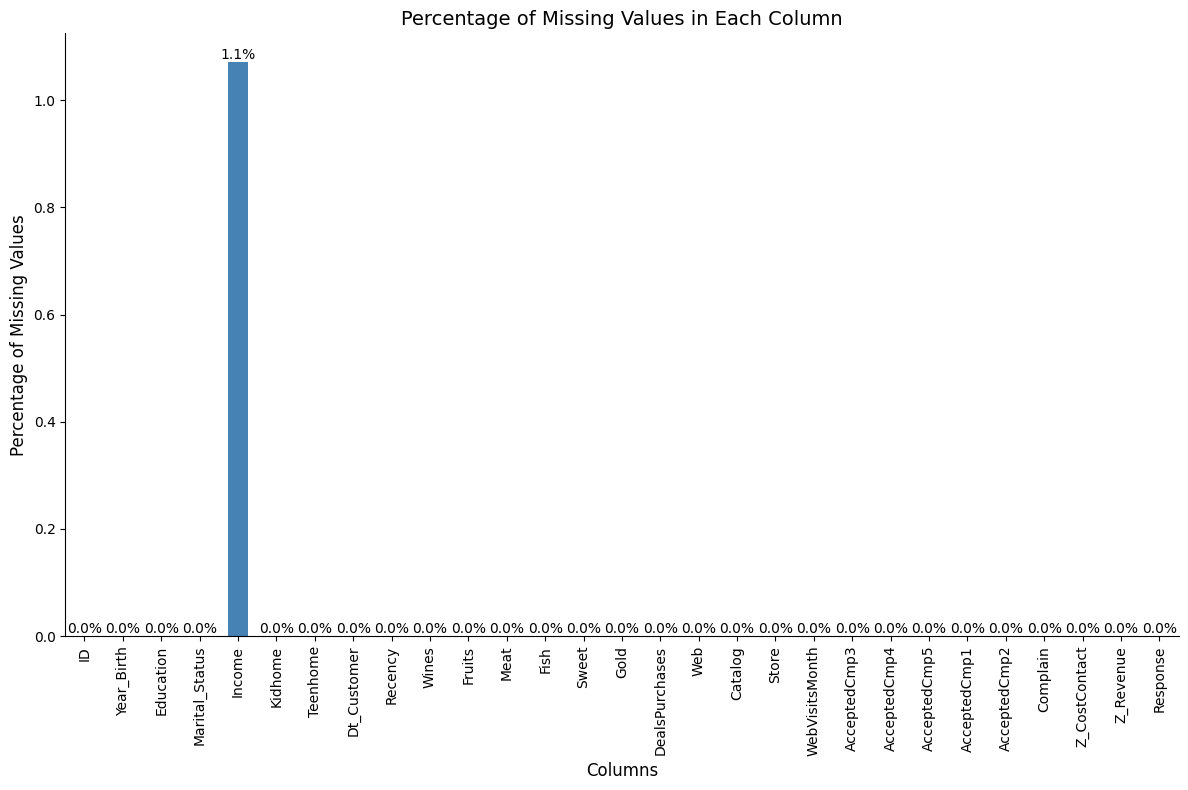

In [11]:
plot_missing_percentage(df)

We have Missing Data only in Income Column


Fucntions

In [12]:
def hist_box_plot(data, numerical_column, bin_count=20):
    """
    Generate a histogram and a box plot side by side for a numerical column in a DataFrame.

    Parameters:
    - data: pandas DataFrame
    - numerical_column: Label of the numerical column for which to create the plots
    - bin_count: Number of bins for the histogram (default is 20)

    Returns:
    - None (displays the plots)
    """
    plt.figure(figsize=(14, 6))  # Adjust the size as needed

    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(data[numerical_column], bins=bin_count, kde=True)
    plt.title(f'Histogram for {numerical_column}')
    plt.xlabel(numerical_column)
    plt.ylabel('Frequency')

    # Box Plot
    plt.subplot(1, 2, 2)
    sns.boxplot(x=data[numerical_column])
    plt.title(f'Box Plot for {numerical_column}')
    plt.xlabel(numerical_column)

    # Adjust layout to prevent overlapping
    plt.tight_layout()

    # Show the plots
    plt.show()
    
    

def plot_categorical_distribution(dataframe, column_name):
    """
    Plot the percentage distribution of a categorical column using a bar plot.

    Parameters:
    - dataframe: pandas DataFrame
    - column_name: str, the name of the categorical column to be plotted

    Returns:
    - None (displays the bar plot)
    """
    # Calculate the percentage distribution of the categorical column
    column_percentage = dataframe[column_name].value_counts(normalize=True) * 100

    plt.figure(figsize=(10, 6))
    sns.barplot(x=column_percentage.index, y=column_percentage.values, palette='viridis')
    plt.title(f'{column_name} Percentage Distribution')
    plt.xlabel(column_name)
    plt.ylabel('Percentage')
    plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
    plt.show()

    # Print the percentages for each category
    for category, percentage in column_percentage.items():
        print(f"{column_name}: {category}, Percentage: {percentage:.2f}%")

def median_plot_categorical_numerical(data, categorical_column, numerical_column, title='Median Plot'):
    """
    Create a median plot to visualize the distribution of a numerical column across categories.

    Parameters:
    - data: DataFrame
    - categorical_column: str
        The name of the categorical column.
    - numerical_column: str
        The name of the numerical column.
    - title: str, optional (default='Median Plot')
        The title of the plot.

    Returns:
    - None (displays the plot)
    """
    plt.figure(figsize=(10, 6))  # Adjust the figure size if needed
    sns.pointplot(x=categorical_column, y=numerical_column, data=data, estimator='median', ci=None)
    plt.title(title)
    plt.show()
def plot_discrete_data(df, column_name):
    value_counts = df[column_name].value_counts().sort_index()
    total_count = value_counts.sum()
    percentages = (value_counts / total_count) * 100

    plt.figure(figsize=(10, 6))
    plt.bar(value_counts.index, value_counts.values, color='lightblue', edgecolor='k')
    plt.title(f"Bar Plot for '{column_name}' Column", fontsize=14)
    plt.xlabel('Values', fontsize=12)
    plt.ylabel('Frequency', fontsize=12)
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)
    plt.grid(axis='y', linestyle='--', alpha=0.7)

    # Add percentage labels
    for i, count in enumerate(value_counts):
        percentage = percentages[i]
        plt.text(value_counts.index[i], count + 0.5, f"{percentage:.2f}%", ha='center', fontsize=10)

    plt.tight_layout()
    plt.show()  
    
def box_plot_categorical_numerical(data, categorical_column, numerical_column, title='Box Plot'):
    """
    Create a box plot to visualize the distribution of a numerical column across categories.

    Parameters:
    - data: DataFrame
    - categorical_column: str
        The name of the categorical column.
    - numerical_column: str
        The name of the numerical column.
    - title: str, optional (default='Box Plot')
        The title of the plot.

    Returns:
    - None (displays the plot)
    """
    plt.figure(figsize=(10, 6))  # Adjust the figure size if needed
    sns.boxplot(x=categorical_column, y=numerical_column, data=data)
    plt.title(title)
    plt.show()     
        
def plot_categorical_hue(dataframe, x_column, hue_column):
    """
    Plot a percentage distribution of a categorical column with unique values of another column as hue.

    Parameters:
    - dataframe: pandas DataFrame
    - x_column: str, the name of the column to be plotted on the x-axis
    - hue_column: str, the name of the column to be used as hue

    Returns:
    - None (displays the plot)
    """
    # Calculate the percentage distribution of the categorical column with hue
    data_percentage = dataframe.groupby([x_column, hue_column]).size().reset_index(name='count')
    data_percentage['percentage'] = (data_percentage['count'] / data_percentage['count'].sum()) * 100

    plt.figure(figsize=(12, 8))
    sns.barplot(x=x_column, y='percentage', hue=hue_column, data=data_percentage, palette='viridis')
    plt.title(f'{x_column} with {hue_column} as Hue - Percentage Distribution')
    plt.xlabel(x_column)
    plt.ylabel('Percentage')
    plt.show()

    # Print the percentages for each category
    for index, row in data_percentage.iterrows():
        print(f"{x_column}: {row[x_column]}, {hue_column}: {row[hue_column]}, Percentage: {row['percentage']:.2f}%")


##### Demographics of Customer 

In [13]:
df[personal_details]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014
...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014


In [14]:
df=df.drop(columns=['ID'])

Age Profile of Customers

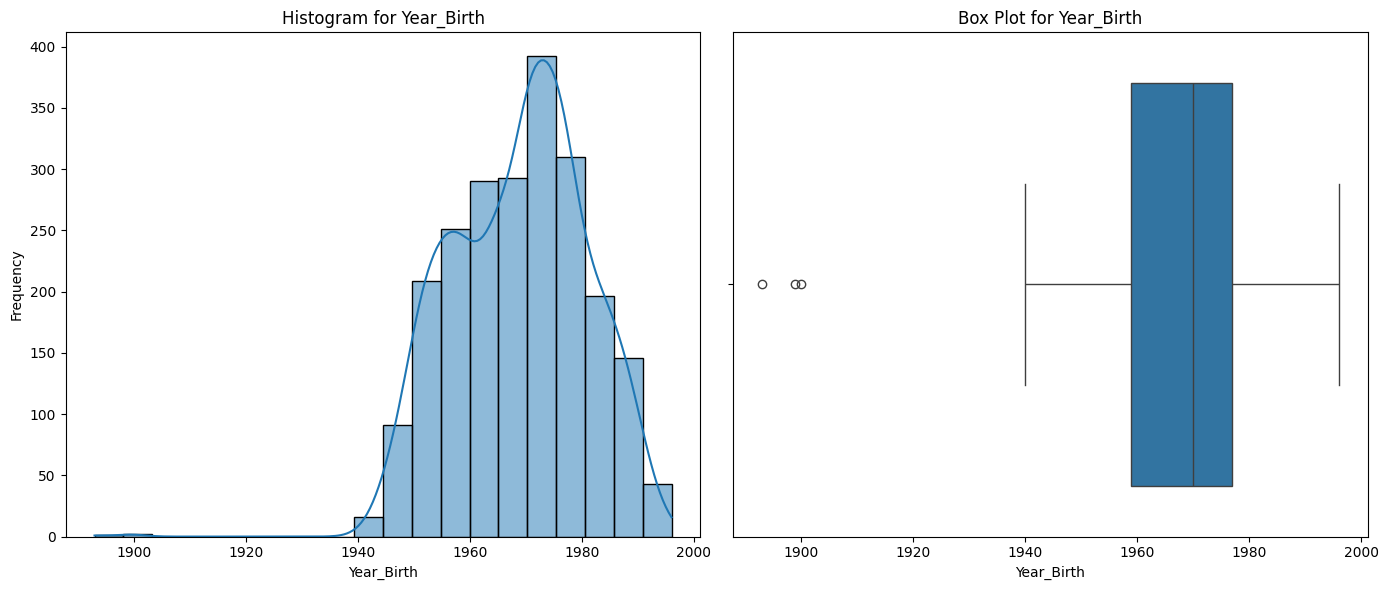

In [15]:
hist_box_plot(data=df, numerical_column='Year_Birth', bin_count=20)

In [16]:
from datetime import datetime

df['Year_Birth'] = pd.to_numeric(df['Year_Birth'], errors='coerce')  # Convert to numeric (handling non-numeric values)
current_year = datetime.now().year
df['Age'] = current_year - df['Year_Birth']

# Optional: Drop the original 'Year_of_Birth' column if needed
df = df.drop(columns=['Year_Birth'])

In [17]:
def remove_outliers(df, column_name, lower_quantile=0.05, upper_quantile=0.95):
    """
    Remove outliers from a numerical column in a DataFrame using quantiles.

    Parameters:
    - df (pd.DataFrame): The DataFrame containing the data.
    - column_name (str): The name of the numerical column with outliers.
    - lower_quantile (float): The lower quantile threshold to identify outliers.
    - upper_quantile (float): The upper quantile threshold to identify outliers.

    Returns:
    - pd.DataFrame: The DataFrame with outliers removed.
    """
    # Find the quantiles
    lower_bound = df[column_name].quantile(lower_quantile)
    upper_bound = df[column_name].quantile(upper_quantile)

    # Remove outliers
    df_filtered = df[(df[column_name] >= lower_bound) & (df[column_name] <= upper_bound)]

    return df_filtered

df=remove_outliers(df, column_name='Age', lower_quantile=0.05, upper_quantile=0.99)

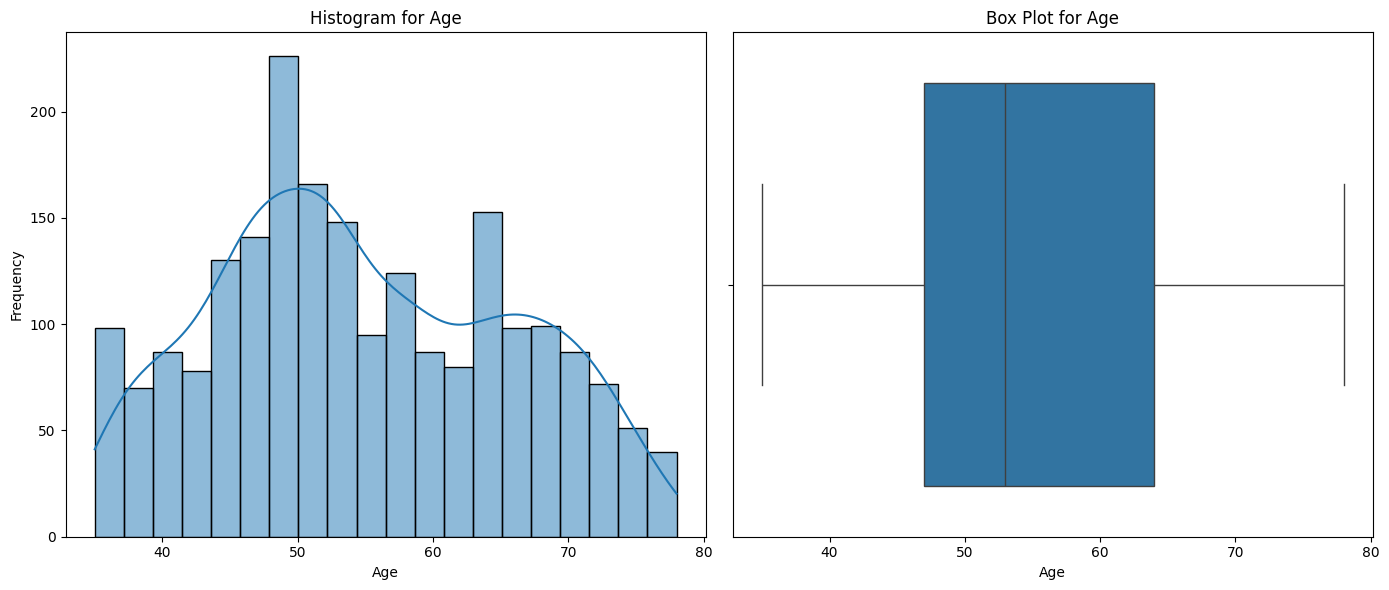

In [18]:
hist_box_plot(data=df, numerical_column='Age', bin_count=20)

- Middle Aged Customers 

The data comprises primarily middle-aged customers, predominantly ranging from 30 to 80 years old

##### Education Qualifactions 

In [19]:
df['Education']=df['Education'].replace({'Basic':'Undergraduate','2n Cycle':'Undergraduate','Graduation':'Graduate','Master':'Postgraduate','PhD':'Postgraduate'})

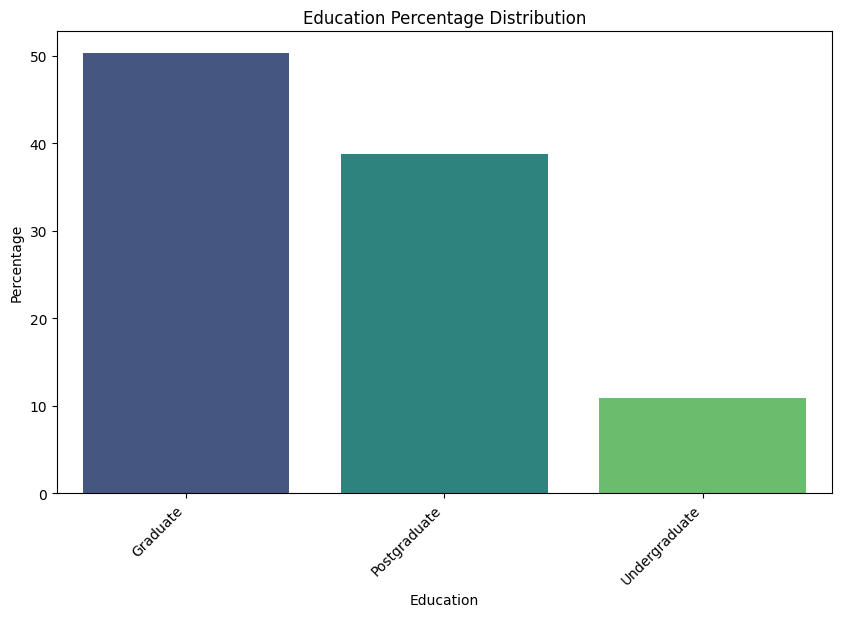

Education: Graduate, Percentage: 50.28%
Education: Postgraduate, Percentage: 38.78%
Education: Undergraduate, Percentage: 10.94%


In [20]:
plot_categorical_distribution(dataframe=df, column_name='Education')

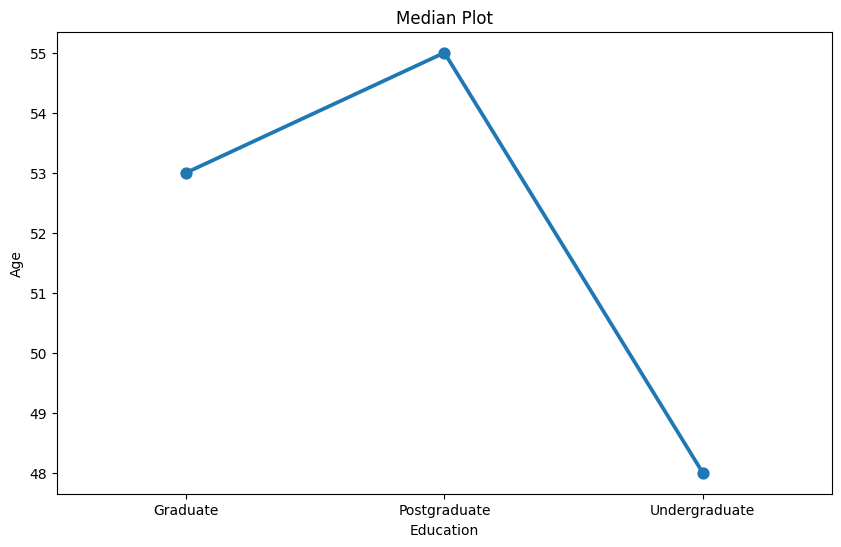

In [21]:
median_plot_categorical_numerical(data=df,categorical_column='Education',numerical_column='Age')

**Median Age and Education Qualifications**

- **Graduation:** Median Age - 53
- **Ph.D.:** Median Age - 56
- **Master's:** Median Age - 54
- **Basic Education:** Median Age - 43
- **2nd Cycle (Assumed):** Median Age - 48


In [22]:
df.columns

Index(['Education', 'Marital_Status', 'Income', 'Kidhome', 'Teenhome',
       'Dt_Customer', 'Recency', 'Wines', 'Fruits', 'Meat', 'Fish', 'Sweet',
       'Gold', 'DealsPurchases', 'Web', 'Catalog', 'Store', 'WebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
       'Age'],
      dtype='object')

Marital Status

In [23]:
df['Marital_Status'].unique()

array(['Single', 'Together', 'Married', 'Divorced', 'Widow', 'Alone',
       'Absurd', 'YOLO'], dtype=object)

In [24]:
# Deriving Living attributes based on the marital status
df['Living_With'] = df['Marital_Status'].replace({'Married':'Partner', 'Together':'Partner', 'Single':'Alone', 'Divorced':'Alone',
                                                'Widow':'Alone', 'Absurd':'Alone', 'YOLO':'Alone'})

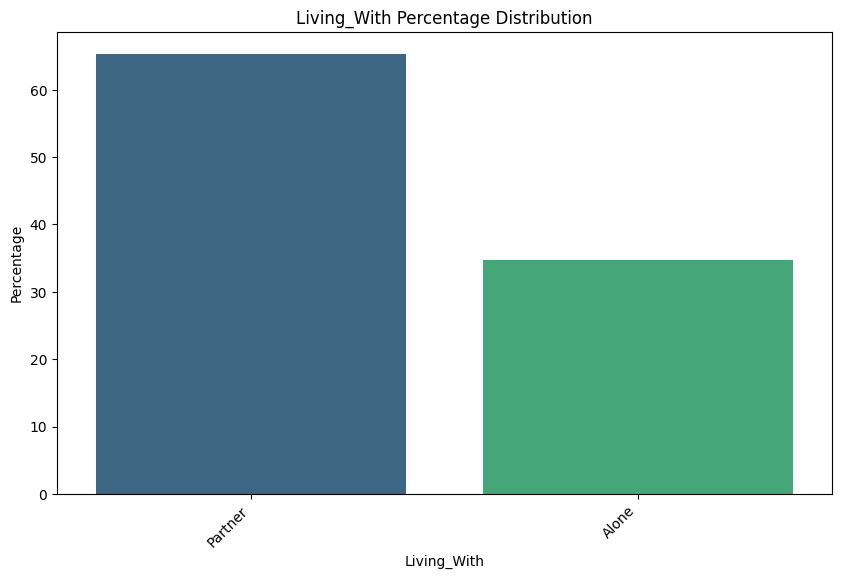

Living_With: Partner, Percentage: 65.31%
Living_With: Alone, Percentage: 34.69%


In [25]:
plot_categorical_distribution(df, column_name='Living_With')

In [26]:
def remove_rows_by_category(data, category_column, categories_to_remove):
    """
    Remove rows with specified categories from a DataFrame.

    Parameters:
    - data: DataFrame
    - category_column: str, the categorical column
    - categories_to_remove: list of str, the categories to be removed
    """
    # Use the "isin" method to filter rows with specified categories
    filtered_data = data[~data[category_column].isin(categories_to_remove)]

    return filtered_data
df=remove_rows_by_category(data=df, category_column='Marital_Status', categories_to_remove=['YOLO','Absurd'])

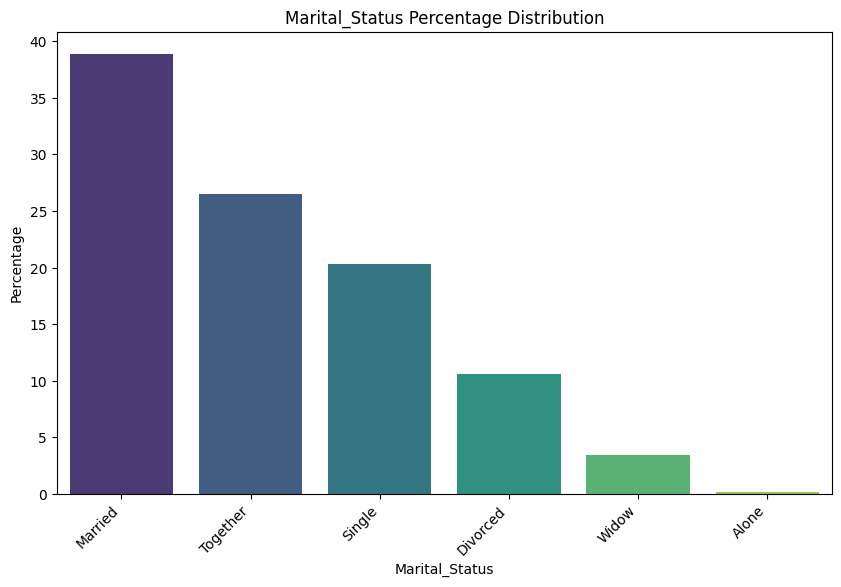

Marital_Status: Married, Percentage: 38.88%
Marital_Status: Together, Percentage: 26.52%
Marital_Status: Single, Percentage: 20.36%
Marital_Status: Divorced, Percentage: 10.63%
Marital_Status: Widow, Percentage: 3.48%
Marital_Status: Alone, Percentage: 0.14%


In [27]:
plot_categorical_distribution(df, column_name='Marital_Status')

**Marital Status Distribution**

- **Married:** 38.83%
- **Together:** 26.48%
- **Single:** 20.33%
- **Divorced:** 10.61%
- **Widow:** 3.47%
- **Alone:** 0.14%


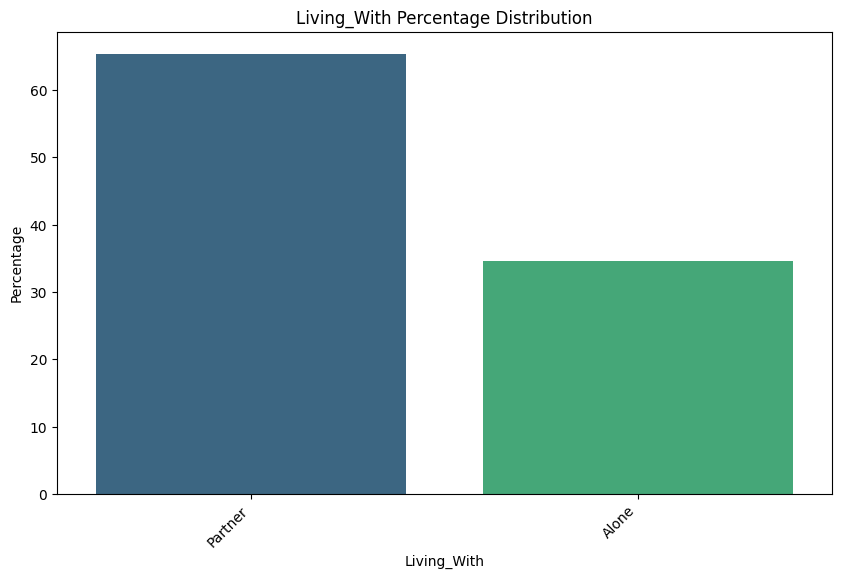

Living_With: Partner, Percentage: 65.40%
Living_With: Alone, Percentage: 34.60%


In [28]:
plot_categorical_distribution(dataframe=df,column_name='Living_With')

OffSpring

In [29]:
df.columns

Index(['Education', 'Marital_Status', 'Income', 'Kidhome', 'Teenhome',
       'Dt_Customer', 'Recency', 'Wines', 'Fruits', 'Meat', 'Fish', 'Sweet',
       'Gold', 'DealsPurchases', 'Web', 'Catalog', 'Store', 'WebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
       'Age', 'Living_With'],
      dtype='object')

In [30]:
df['Total_Offsprings']=df['Kidhome']+df['Teenhome']

In [31]:
#df['Total_Offsprings'] = pd.cut(df['Total_Offsprings'], bins=[-1, 0, 1, 2, float('inf')],
                #                 labels=['No Total_Offsprings', 'One Child', 'Two Children', 'Three or More Children'],
              #                   right=False)



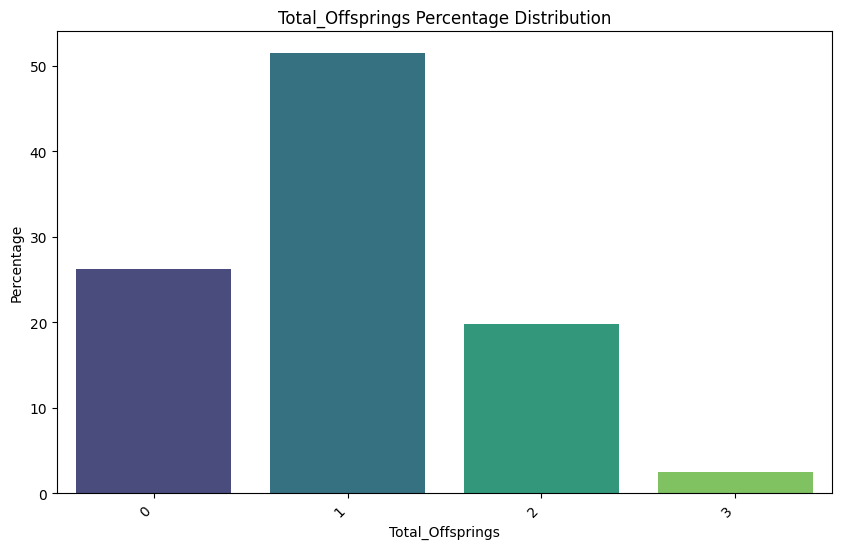

Total_Offsprings: 1, Percentage: 51.43%
Total_Offsprings: 0, Percentage: 26.28%
Total_Offsprings: 2, Percentage: 19.79%
Total_Offsprings: 3, Percentage: 2.49%


In [32]:
plot_categorical_distribution(df,'Total_Offsprings')

When do customers conduct transactions according to the data?

In [33]:
df['Dt_Customer']

0       04-09-2012
1       08-03-2014
2       21-08-2013
3       10-02-2014
4       19-01-2014
           ...    
2235    13-06-2013
2236    10-06-2014
2237    25-01-2014
2238    24-01-2014
2239    15-10-2012
Name: Dt_Customer, Length: 2127, dtype: object

In [34]:
# Convert 'Dt_Customer' column to datetime format
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], format='%d-%m-%Y')

# Check the datatype of the 'Dt_Customer' column
print(df['Dt_Customer'].dtype)

# Extract year, month (as a string), and day and create new columns
df['Year'] = df['Dt_Customer'].dt.year
df['Month'] = df['Dt_Customer'].dt.strftime('%B')  # '%B' gives full month name
df['Day'] = df['Dt_Customer'].dt.day

# Display the DataFrame with the new columns
print(df[['Dt_Customer', 'Year', 'Month', 'Day']])

datetime64[ns]
     Dt_Customer  Year      Month  Day
0     2012-09-04  2012  September    4
1     2014-03-08  2014      March    8
2     2013-08-21  2013     August   21
3     2014-02-10  2014   February   10
4     2014-01-19  2014    January   19
...          ...   ...        ...  ...
2235  2013-06-13  2013       June   13
2236  2014-06-10  2014       June   10
2237  2014-01-25  2014    January   25
2238  2014-01-24  2014    January   24
2239  2012-10-15  2012    October   15

[2127 rows x 4 columns]


In [35]:

def plot_heatmap(df, column):
    """
    Generate a heatmap for a specific column in the given DataFrame.

    Parameters:
    - df: DataFrame, the input dataframe.
    - column: str, the column for which the heatmap should be generated.
    """
    # Pivot the dataframe to create a heatmap-friendly format
    heatmap_data = df.pivot_table(index='Year', columns=column, aggfunc='size', fill_value=0)

    # Create the heatmap using Seaborn
    plt.figure(figsize=(10, 6))  # Adjust the figure size if needed
    sns.heatmap(heatmap_data, annot=True, cmap='YlGnBu', fmt='g', linewidths=.5)

    # Set plot labels and title
    plt.xlabel(column)
    plt.ylabel('Year')
    plt.title(f'Heatmap of {column} Over the Years')

    # Show the plot
    plt.show()


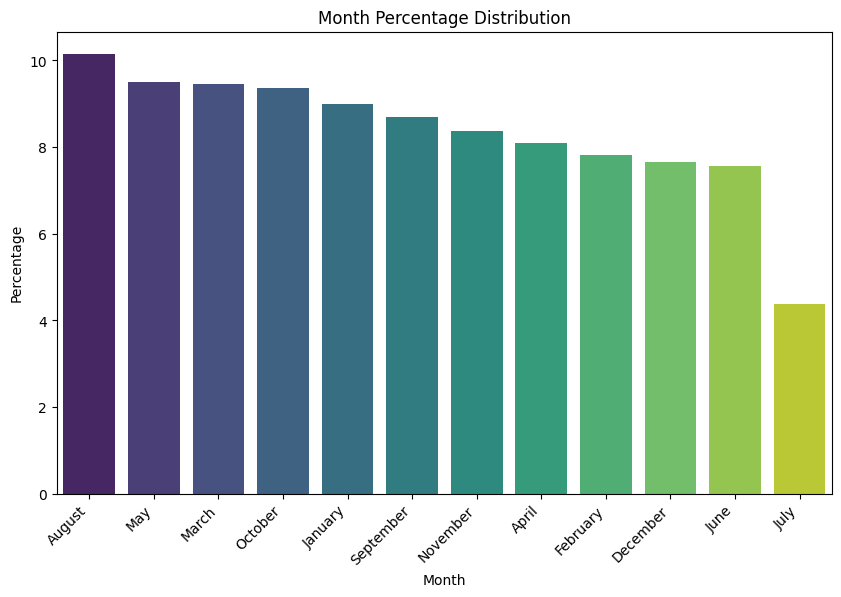

Month: August, Percentage: 10.16%
Month: May, Percentage: 9.50%
Month: March, Percentage: 9.45%
Month: October, Percentage: 9.36%
Month: January, Percentage: 8.98%
Month: September, Percentage: 8.70%
Month: November, Percentage: 8.37%
Month: April, Percentage: 8.09%
Month: February, Percentage: 7.80%
Month: December, Percentage: 7.66%
Month: June, Percentage: 7.57%
Month: July, Percentage: 4.37%


In [36]:
plot_categorical_distribution(dataframe=df,column_name='Month')

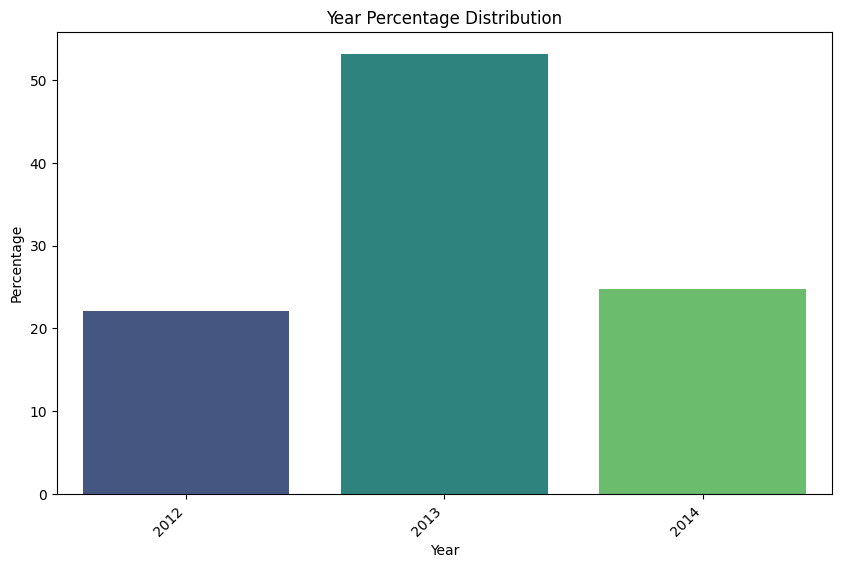

Year: 2013, Percentage: 53.13%
Year: 2014, Percentage: 24.78%
Year: 2012, Percentage: 22.10%


In [37]:
plot_categorical_distribution(dataframe=df,column_name='Year')

##### Income Distribution accorss the Data

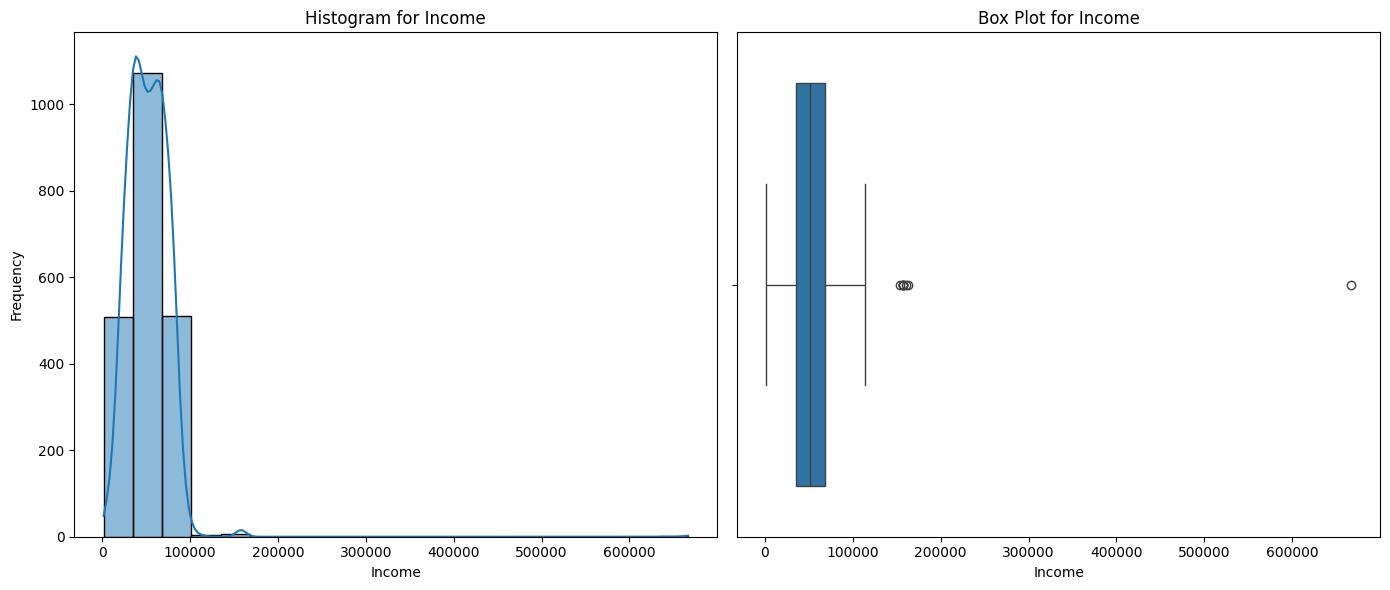

In [38]:
hist_box_plot(data=df,numerical_column='Income')

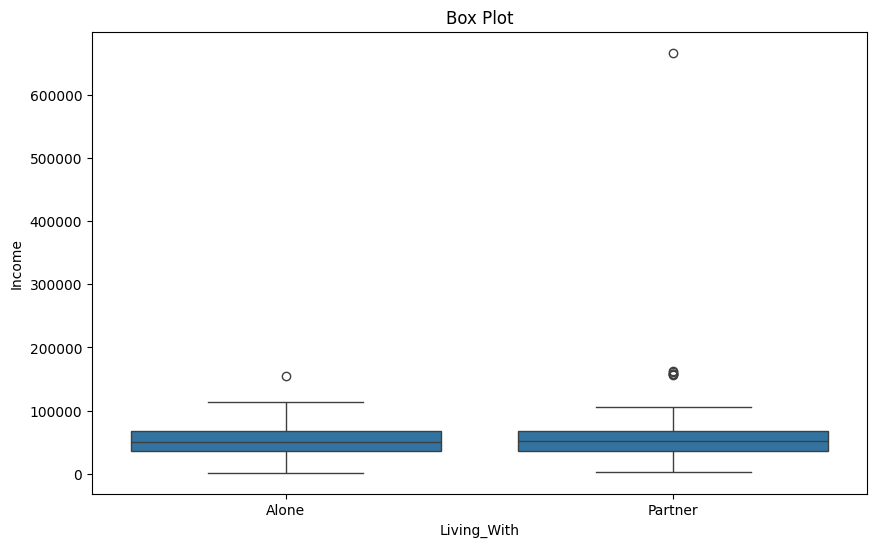

In [39]:
box_plot_categorical_numerical(data=df,categorical_column='Living_With',numerical_column='Income')

People Living with Parterns have sme Values with very high Income

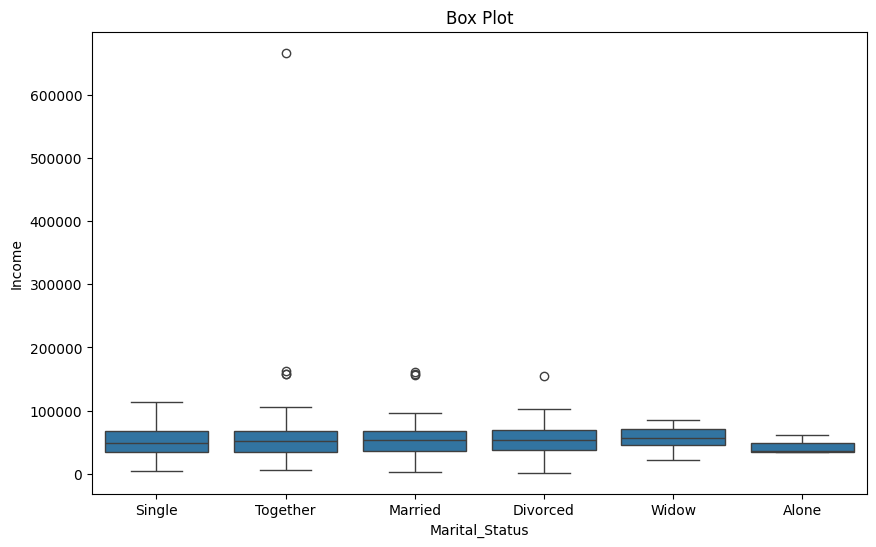

In [40]:
box_plot_categorical_numerical(data=df,categorical_column='Marital_Status',numerical_column='Income')

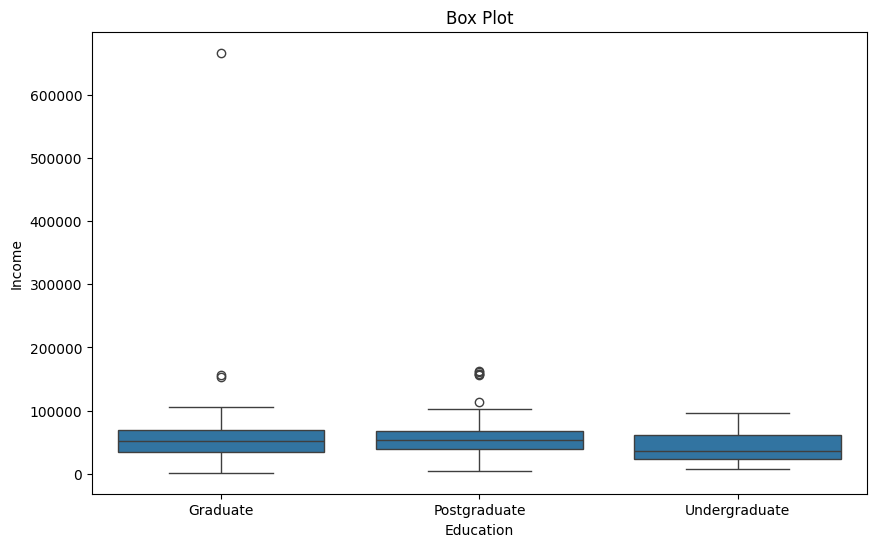

In [41]:
box_plot_categorical_numerical(data=df,categorical_column='Education',numerical_column='Income')

In [42]:
df.isna().sum()

Education            0
Marital_Status       0
Income              22
Kidhome              0
Teenhome             0
Dt_Customer          0
Recency              0
Wines                0
Fruits               0
Meat                 0
Fish                 0
Sweet                0
Gold                 0
DealsPurchases       0
Web                  0
Catalog              0
Store                0
WebVisitsMonth       0
AcceptedCmp3         0
AcceptedCmp4         0
AcceptedCmp5         0
AcceptedCmp1         0
AcceptedCmp2         0
Complain             0
Z_CostContact        0
Z_Revenue            0
Response             0
Age                  0
Living_With          0
Total_Offsprings     0
Year                 0
Month                0
Day                  0
dtype: int64

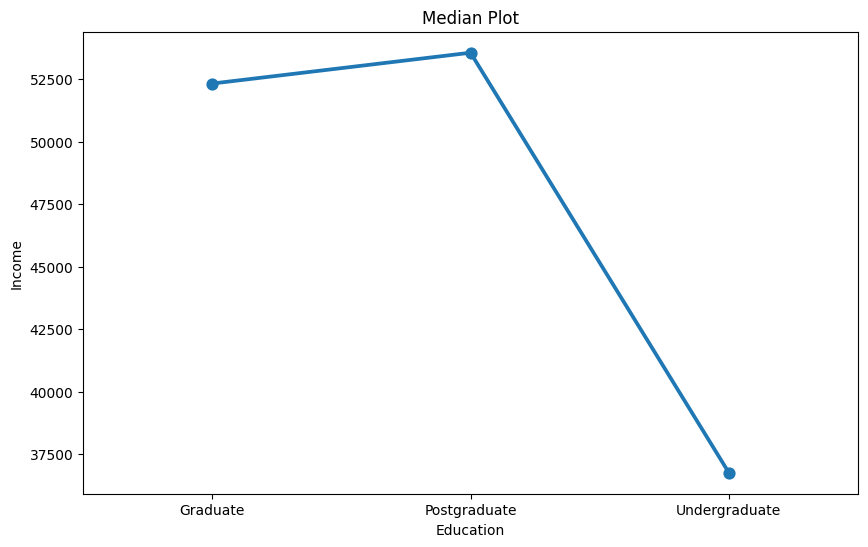

In [43]:
median_plot_categorical_numerical(data=df,categorical_column='Education',numerical_column='Income')

Median Income of PHD , is Highest Followed by Master and GRaduation 

Least being Poeple with Basic Education

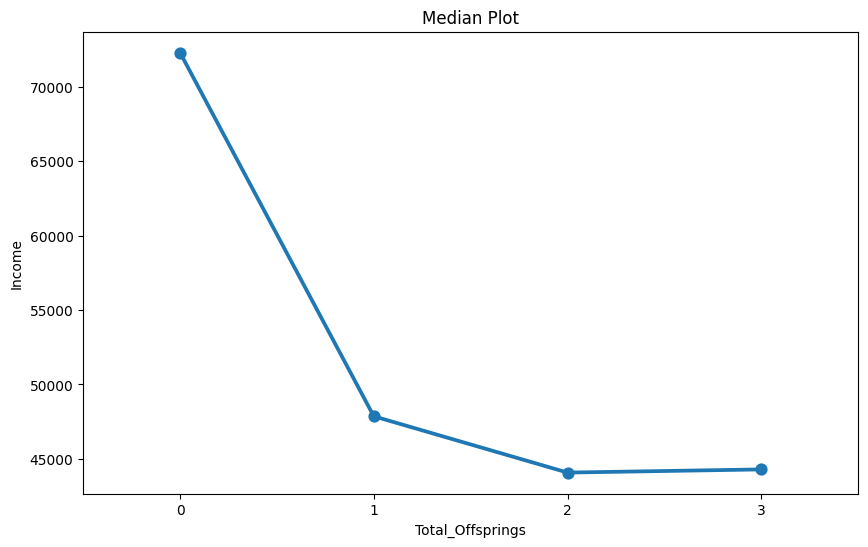

In [44]:
median_plot_categorical_numerical(data=df,categorical_column='Total_Offsprings',numerical_column='Income')

Income of the Demogrpahic with One child has highest Income

##### What Products have Customer Purchased?

In [45]:
df[products]

,Recency,Wines,Fruits,Meat,Fish,Sweet,Gold
0,58,635,88,546,172,88,88
1,38,11,1,6,2,1,6
2,26,426,49,127,111,21,42
3,26,11,4,20,10,3,5
4,94,173,43,118,46,27,15
...,...,...,...,...,...,...,...
2235,46,709,43,182,42,118,247
2236,56,406,0,30,0,0,8
2237,91,908,48,217,32,12,24
2238,8,428,30,214,80,30,61


In [46]:
# Create a new column "Total_Expenditure" and sum specified columns for each row
df["Total_Expenditure"] = df[["Wines", "Fruits", "Meat", "Fish", "Sweet", "Gold"]].sum(axis=1)

In [47]:

products=['Recency', "Wines", "Fruits", "Meat", "Fish", "Sweet", "Gold",'Total_Expenditure']

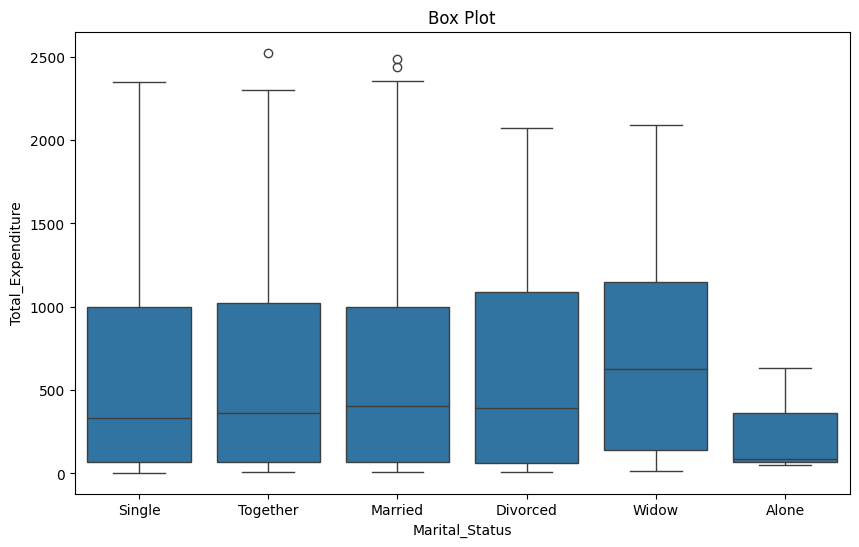

In [48]:
box_plot_categorical_numerical(data=df,categorical_column='Marital_Status',numerical_column='Total_Expenditure')

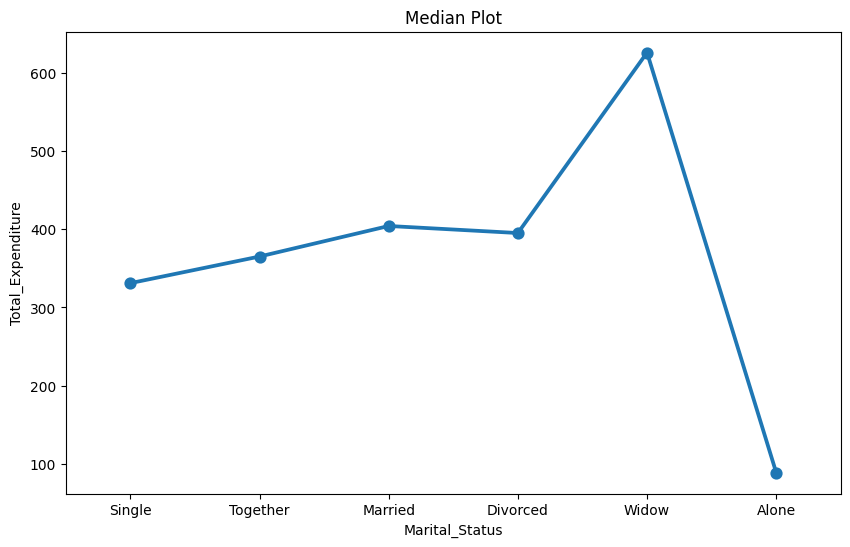

In [49]:
median_plot_categorical_numerical(data=df,numerical_column='Total_Expenditure',categorical_column='Marital_Status')

Customers who live Alone tend to Spend Least  comparatively among all customer segments with Matrital Status



In [50]:
def box_plot_by_category(data, category_column, numerical_columns):
    """
    Plot box plots for multiple numerical columns grouped by a categorical column.

    Parameters:
    - data: DataFrame
    - category_column: str, the categorical column
    - numerical_columns: list of str, the numerical columns to plot
    """
    # Set the style of seaborn for better visualization
    sns.set(style="whitegrid")

    # Calculate the number of rows needed based on the number of numerical columns
    num_plots = len(numerical_columns)
    num_rows = (num_plots // 3) + (num_plots % 3 > 0)  # Ensure at least one row

    # Create subplots with three plots per row
    plt.figure(figsize=(15, 5 * num_rows))
    
    # Loop through numerical columns and create a box plot for each
    for i, numerical_column in enumerate(numerical_columns, 1):
        plt.subplot(num_rows, 3, i)
        sns.boxplot(x=category_column, y=numerical_column, data=data)
        plt.title(f'Box plot of {numerical_column}')
        plt.xticks(rotation=90)

    # Adjust layout
    plt.tight_layout()
    
    
    # Show the plots
    plt.show()

In [51]:
products

['Recency',
 'Wines',
 'Fruits',
 'Meat',
 'Fish',
 'Sweet',
 'Gold',
 'Total_Expenditure']

In [52]:
df[products].dtypes

Recency              int64
Wines                int64
Fruits               int64
Meat                 int64
Fish                 int64
Sweet                int64
Gold                 int64
Total_Expenditure    int64
dtype: object

In [53]:
df.columns

Index(['Education', 'Marital_Status', 'Income', 'Kidhome', 'Teenhome',
       'Dt_Customer', 'Recency', 'Wines', 'Fruits', 'Meat', 'Fish', 'Sweet',
       'Gold', 'DealsPurchases', 'Web', 'Catalog', 'Store', 'WebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
       'Age', 'Living_With', 'Total_Offsprings', 'Year', 'Month', 'Day',
       'Total_Expenditure'],
      dtype='object')

In [54]:
df["Living_With"]

0         Alone
1         Alone
2       Partner
3       Partner
4       Partner
         ...   
2235    Partner
2236    Partner
2237      Alone
2238    Partner
2239    Partner
Name: Living_With, Length: 2127, dtype: object

In [55]:
df["Living_With"]

0         Alone
1         Alone
2       Partner
3       Partner
4       Partner
         ...   
2235    Partner
2236    Partner
2237      Alone
2238    Partner
2239    Partner
Name: Living_With, Length: 2127, dtype: object

In [56]:
df["Living_With_Replaced"] = df["Living_With"].replace({"Alone": 1, "Partner": 2})
df["Family_Size"] = df["Living_With_Replaced"].astype(int) + df["Total_Offsprings"].astype(int)


In [57]:
df['Total_Offsprings'] = pd.cut(df['Total_Offsprings'], bins=[-1, 0, 1, 2, float('inf')],
                                 labels=['No Total_Offsprings', 'One Child', 'Two Children', 'Three or More Children'],
                                 right=False)



Median Price of the Products|

In [58]:
def median_plot_by_category(data, category_column, numerical_columns):
    """
    Plot median plots for multiple numerical columns grouped by a categorical column.

    Parameters:
    - data: DataFrame
    - category_column: str, the categorical column
    - numerical_columns: list of str, the numerical columns to plot
    """
    # Set the style of seaborn for better visualization
    sns.set(style="whitegrid")

    # Calculate the number of rows needed based on the number of numerical columns
    num_plots = len(numerical_columns)
    num_rows = (num_plots // 3) + (num_plots % 3 > 0)  # Ensure at least one row

    # Create subplots with three plots per row
    plt.figure(figsize=(15, 5 * num_rows))
    
    # Loop through numerical columns and create a median plot for each
    for i, numerical_column in enumerate(numerical_columns, 1):
        plt.subplot(num_rows, 3, i)
        sns.pointplot(x=category_column, y=numerical_column, data=data, estimator='median', ci=None)
        plt.title(f'Median plot of {numerical_column}')
        plt.xticks(rotation=90)  # Rotate x-axis ticks by 90 degrees

    # Adjust layout
    plt.tight_layout()
    
    # Show the plots
    plt.show()

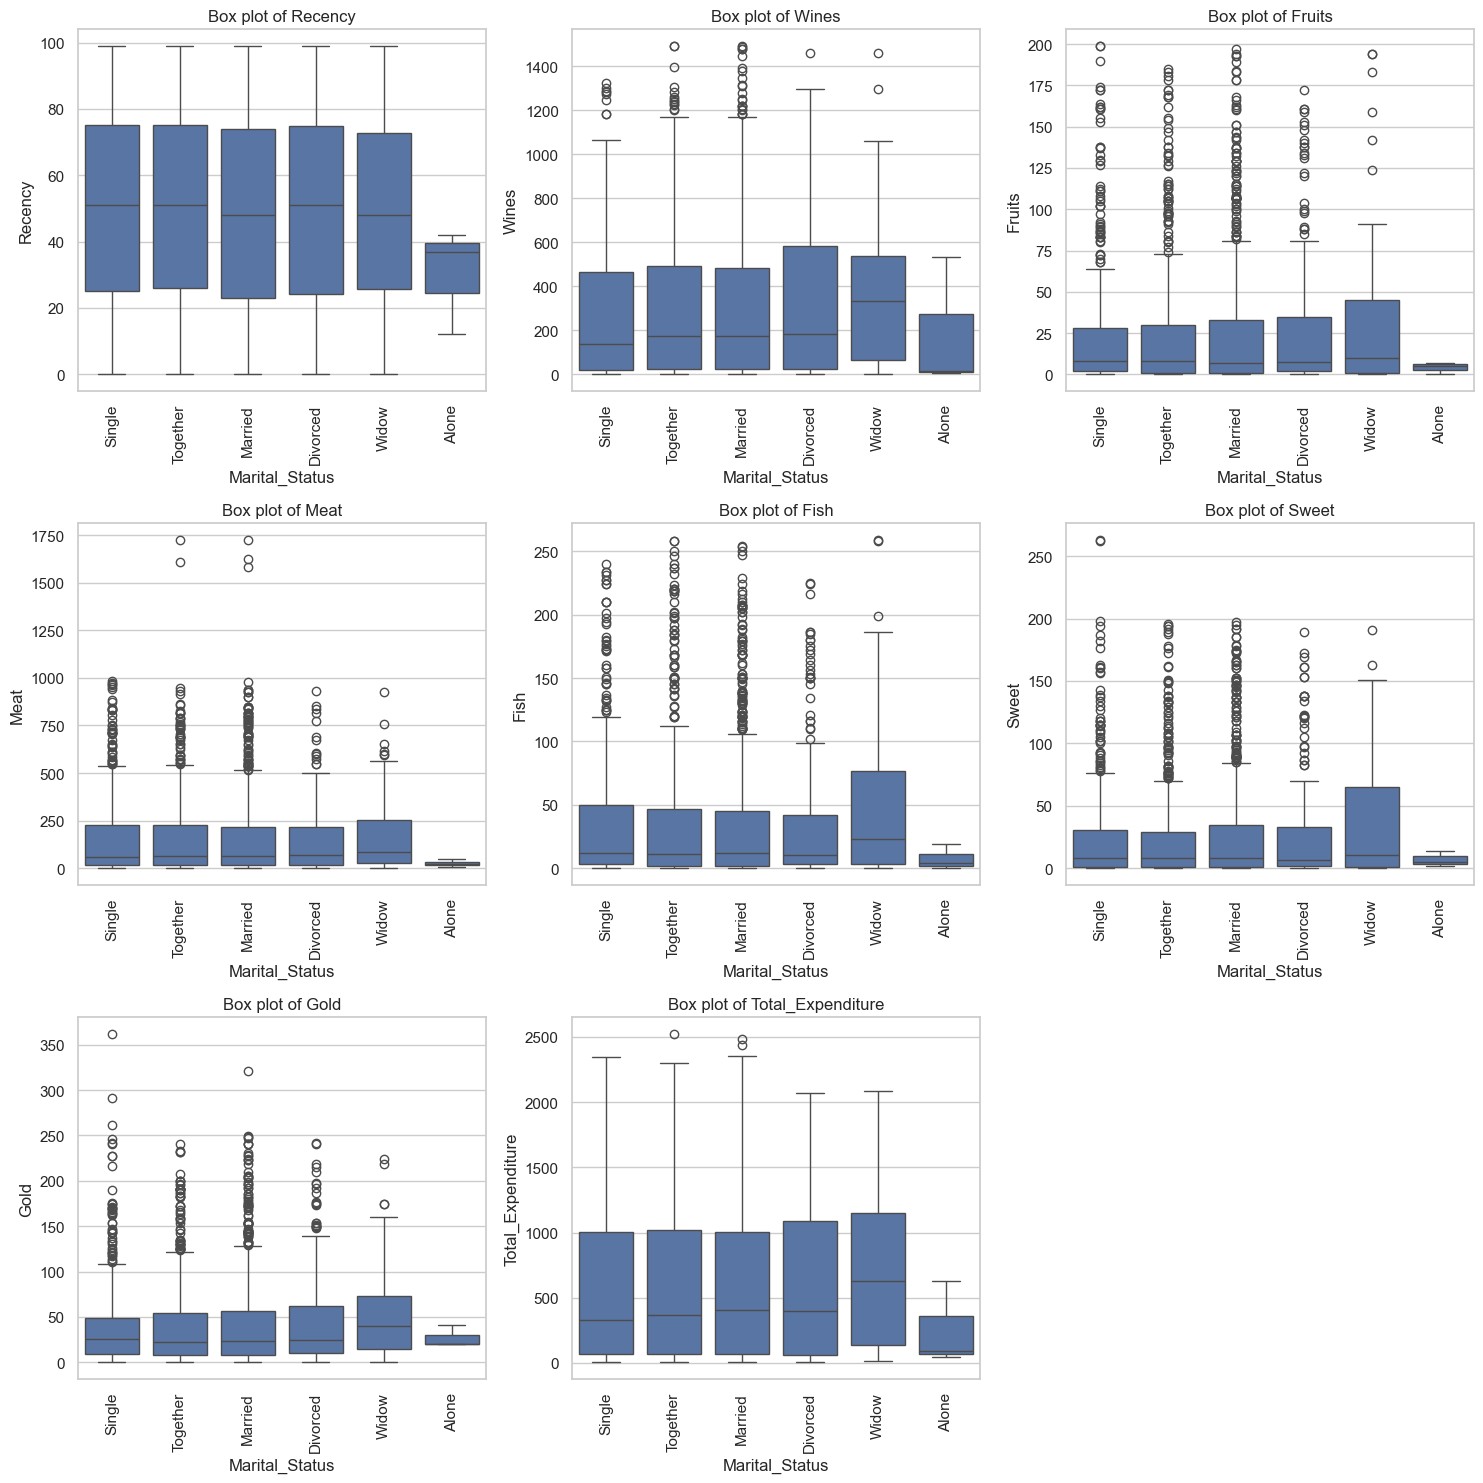

In [59]:
box_plot_by_category(data=df, category_column='Marital_Status', numerical_columns=products)

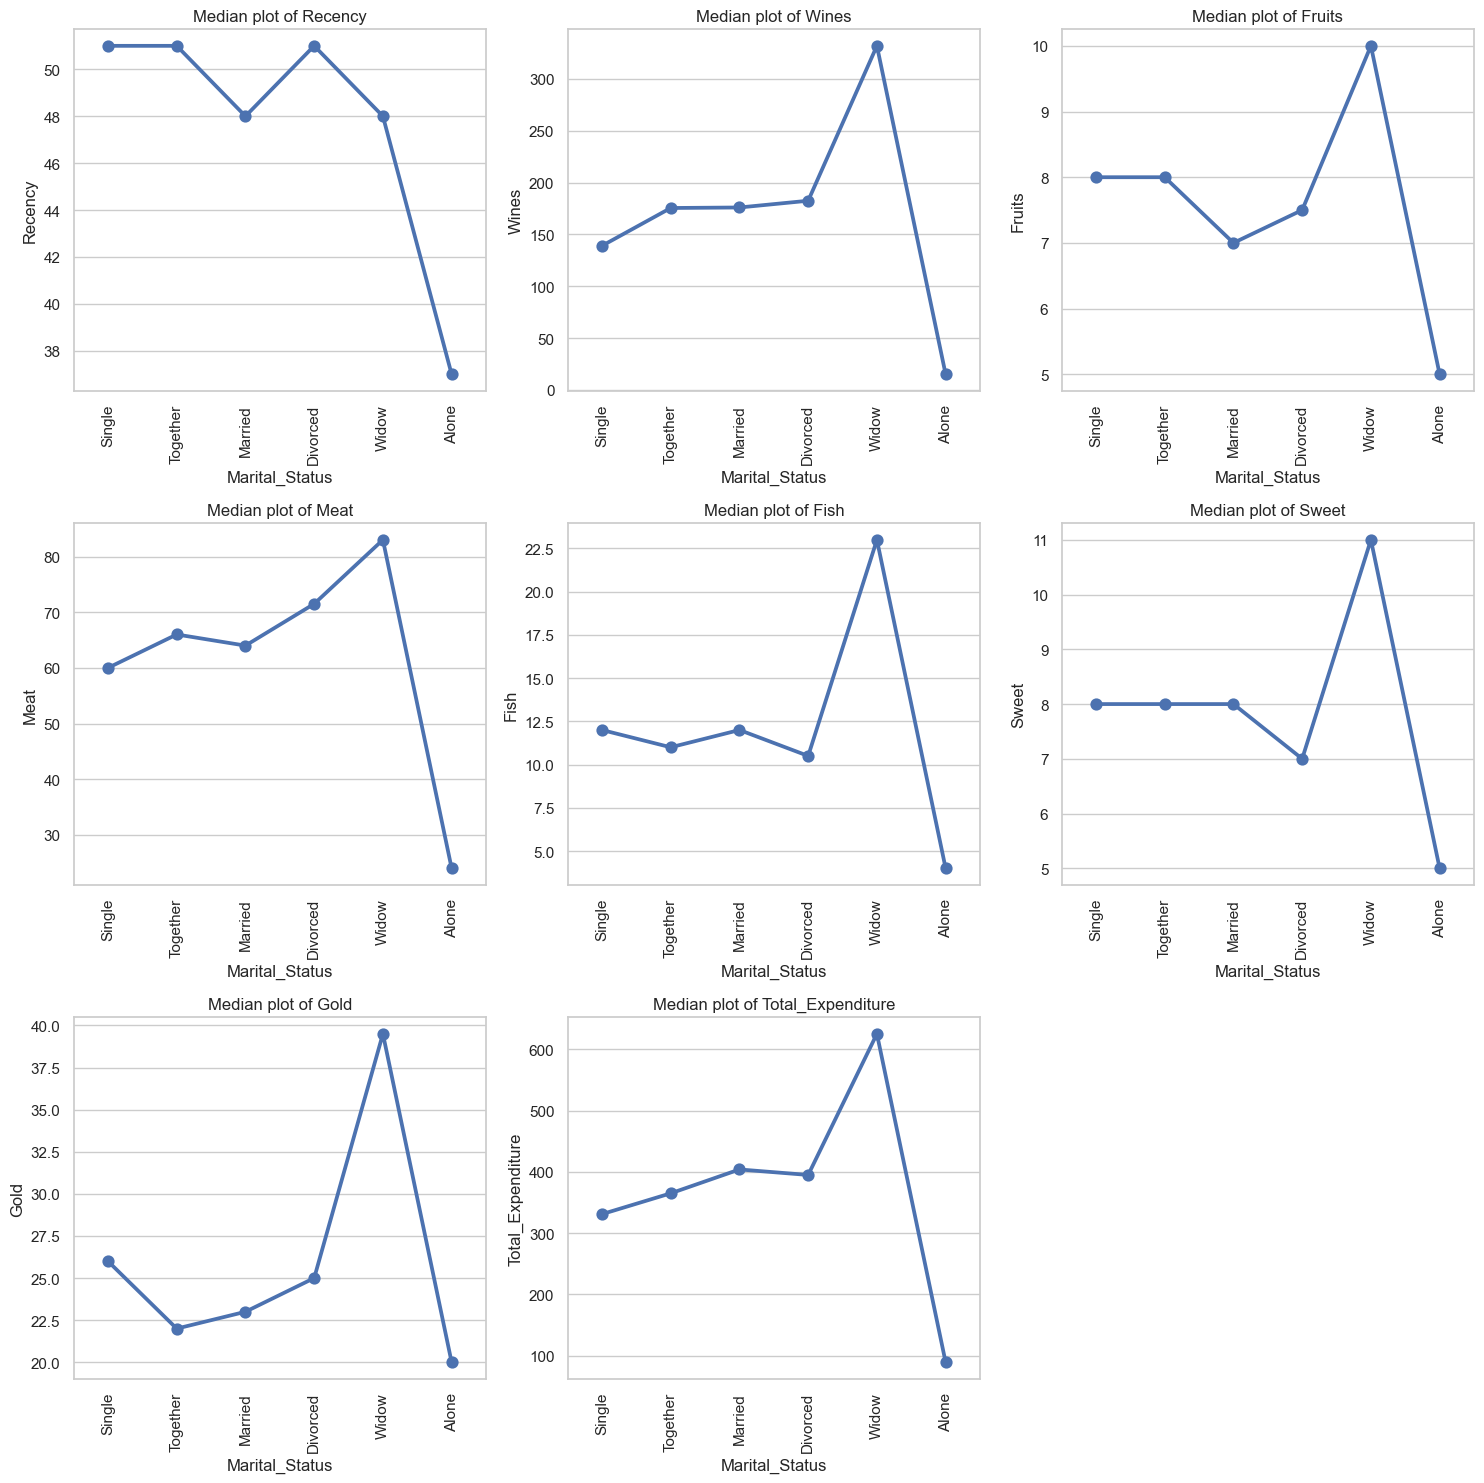

In [60]:
median_plot_by_category(data=df, category_column='Marital_Status', numerical_columns=products)

In general People Alone, has bought less among all the products and Total expenditure 

Windo customeres ahave highes spengin among alll the product sectors and totoal Expensiditure

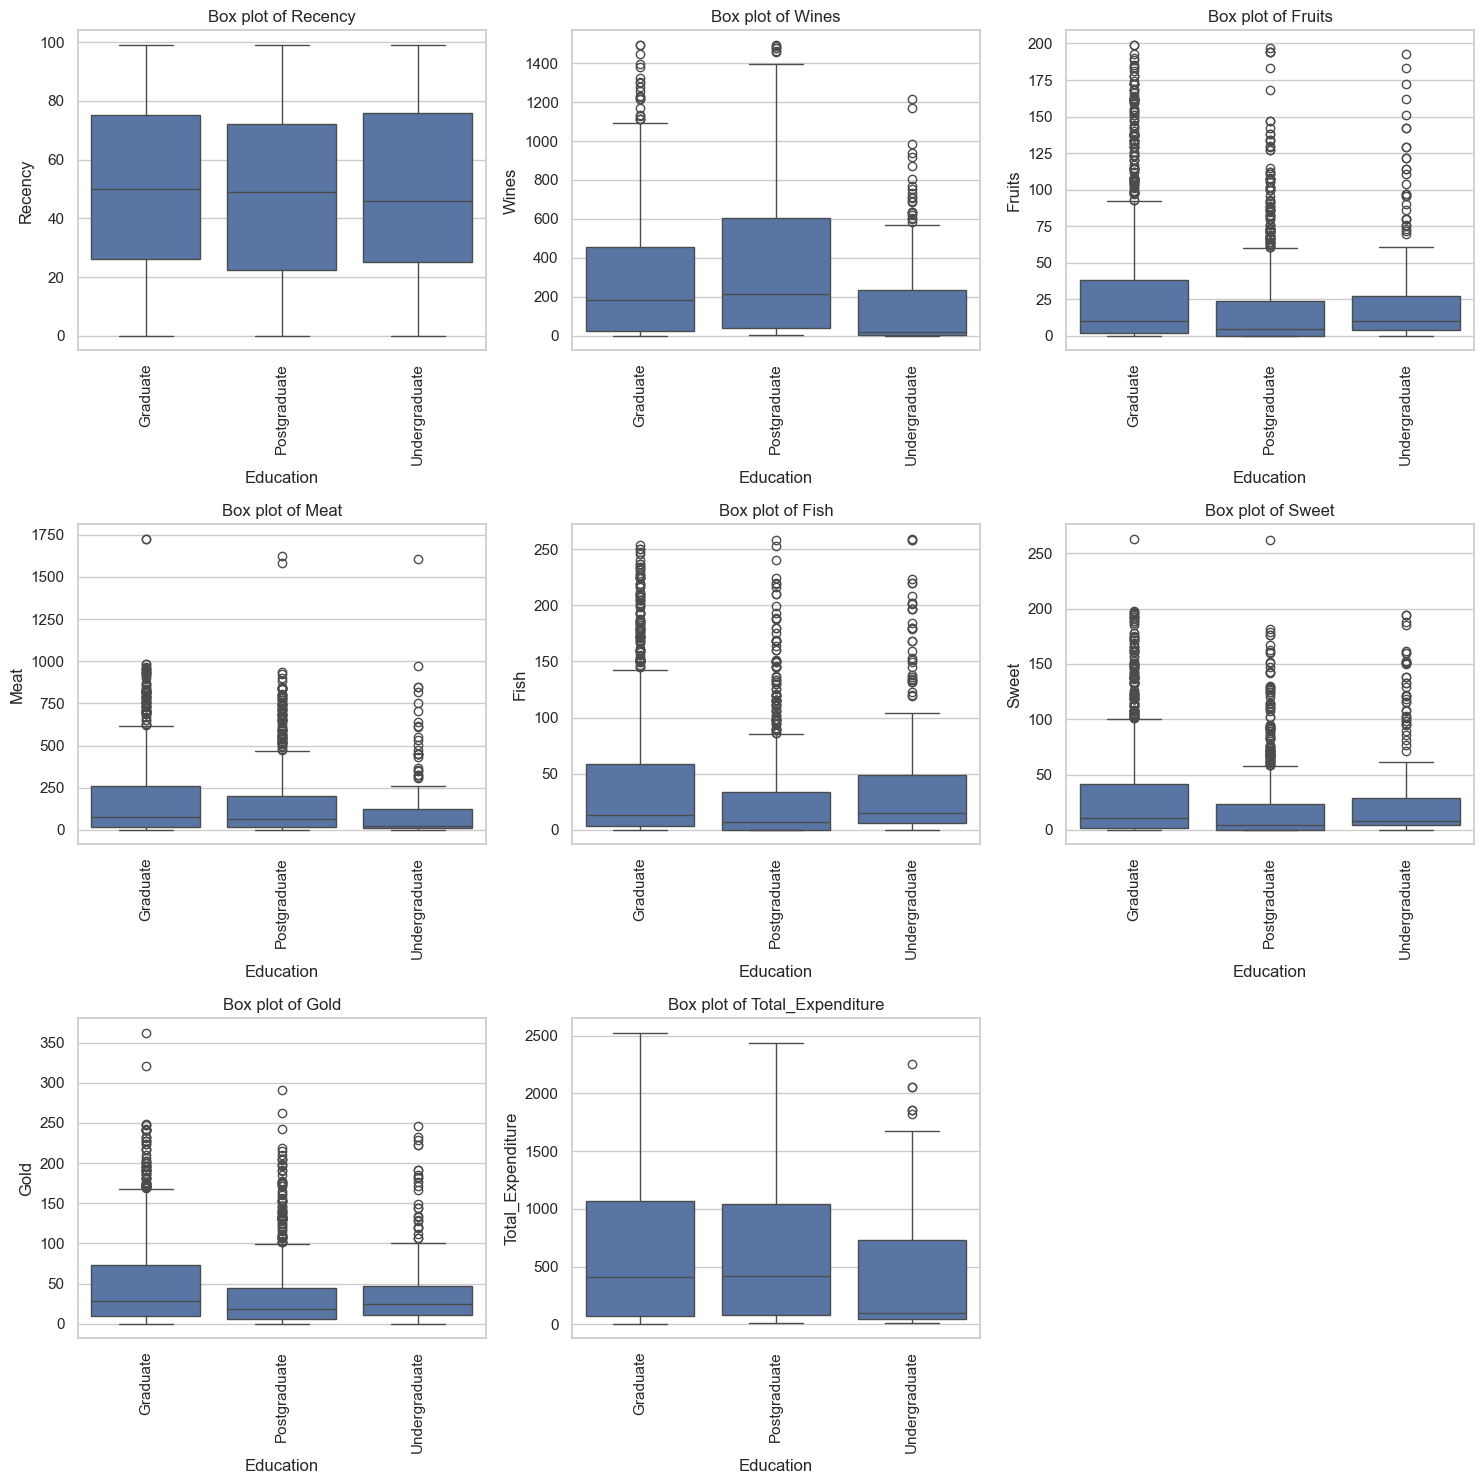

In [61]:
box_plot_by_category(data=df, category_column='Education', numerical_columns=products)

Basic education Make least puraches and TOtal Expeniture amon all the Education Class

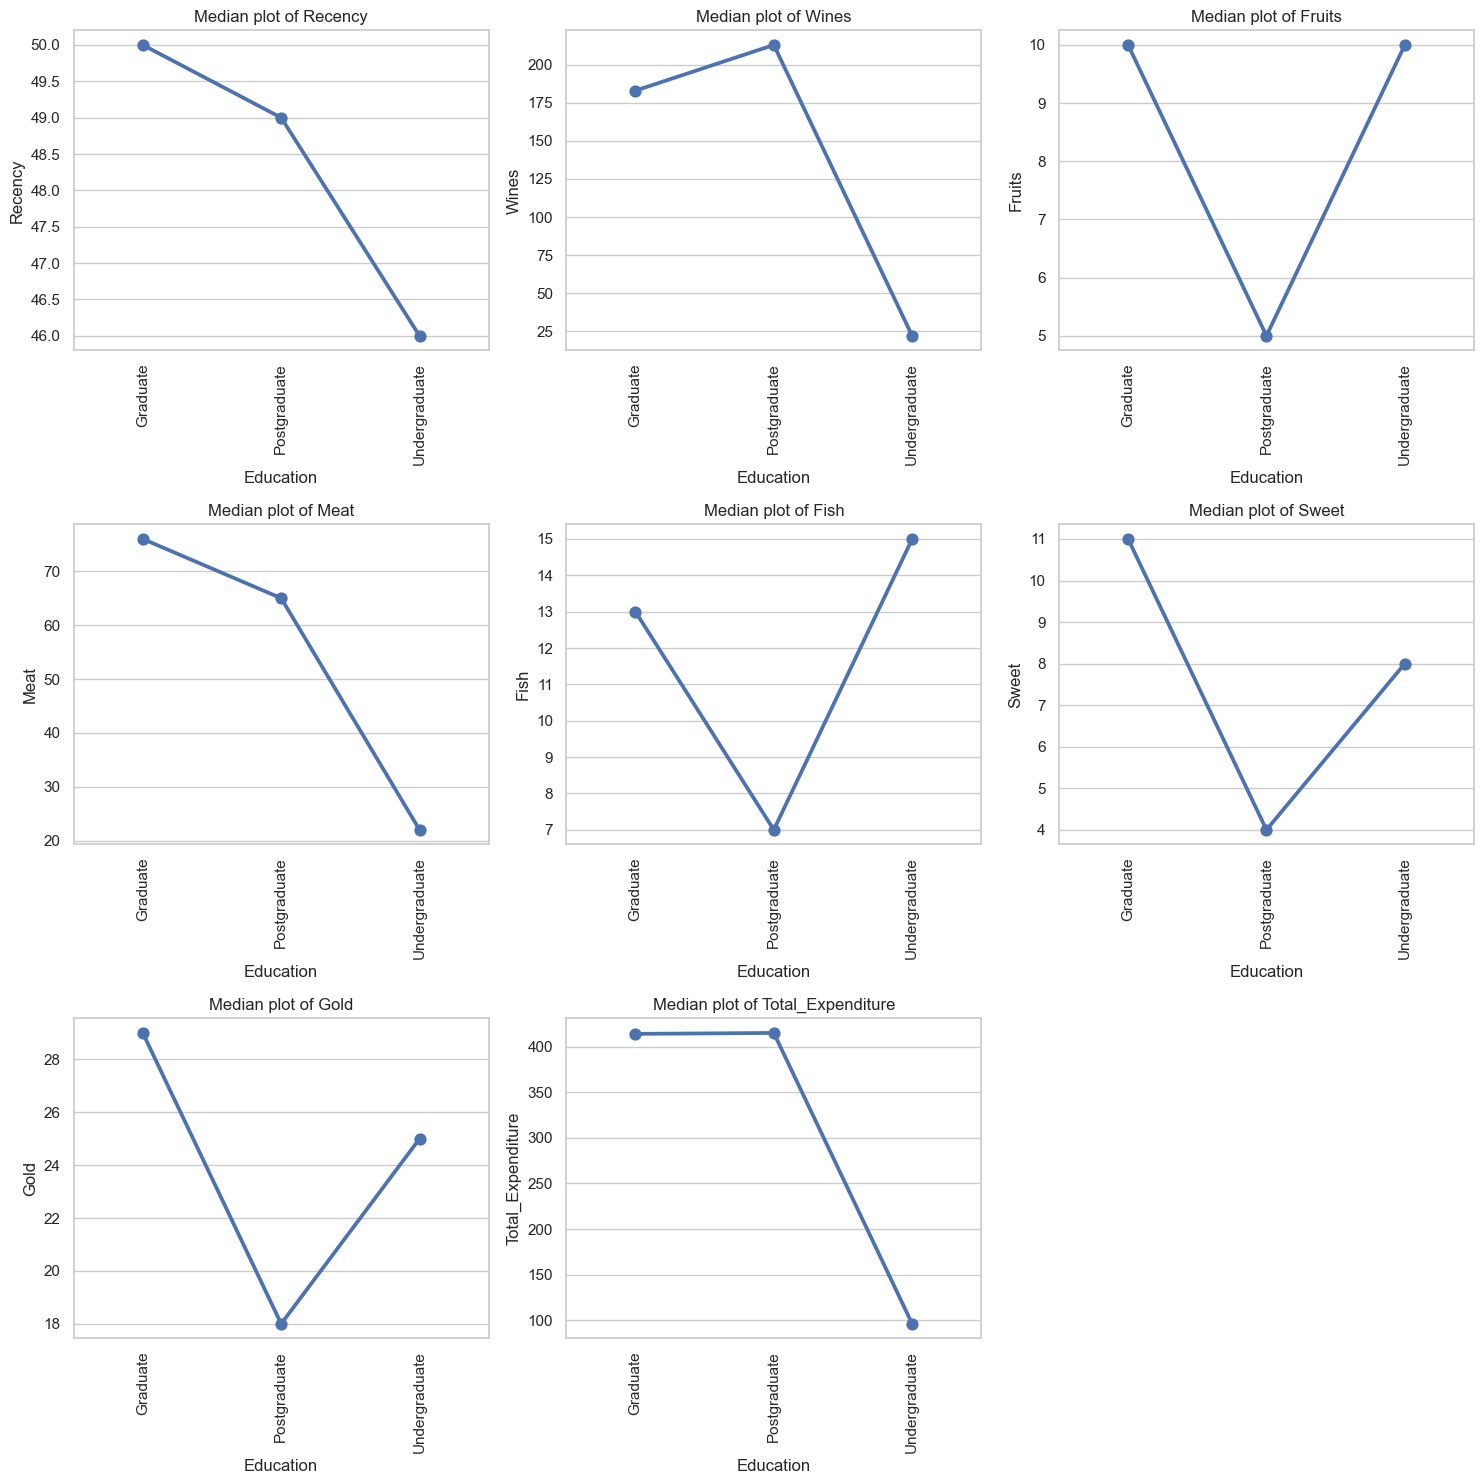

In [62]:
median_plot_by_category(data=df, category_column='Education', numerical_columns=products)

In [63]:
purchases=['NumDealsPurchases', 'NumWebPurchases','NumCatalogPurchases', 'NumStorePurchases']

In [64]:
df

,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,Wines,Fruits,Meat,...,Response,Age,Living_With,Total_Offsprings,Year,Month,Day,Total_Expenditure,Living_With_Replaced,Family_Size
0,Graduate,Single,58138.0,0,0,2012-09-04,58,635,88,546,...,1,66,Alone,One Child,2012,September,4,1617,1,1
1,Graduate,Single,46344.0,1,1,2014-03-08,38,11,1,6,...,0,69,Alone,Three or More Children,2014,March,8,27,1,3
2,Graduate,Together,71613.0,0,0,2013-08-21,26,426,49,127,...,0,58,Partner,One Child,2013,August,21,776,2,2
3,Graduate,Together,26646.0,1,0,2014-02-10,26,11,4,20,...,0,39,Partner,Two Children,2014,February,10,53,2,3
4,Postgraduate,Married,58293.0,1,0,2014-01-19,94,173,43,118,...,0,42,Partner,Two Children,2014,January,19,422,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,Graduate,Married,61223.0,0,1,2013-06-13,46,709,43,182,...,0,56,Partner,Two Children,2013,June,13,1341,2,3
2236,Postgraduate,Together,64014.0,2,1,2014-06-10,56,406,0,30,...,0,77,Partner,Three or More Children,2014,June,10,444,2,5
2237,Graduate,Divorced,56981.0,0,0,2014-01-25,91,908,48,217,...,0,42,Alone,One Child,2014,January,25,1241,1,1
2238,Postgraduate,Together,69245.0,0,1,2014-01-24,8,428,30,214,...,0,67,Partner,Two Children,2014,January,24,843,2,3


In [65]:
df.columns

Index(['Education', 'Marital_Status', 'Income', 'Kidhome', 'Teenhome',
       'Dt_Customer', 'Recency', 'Wines', 'Fruits', 'Meat', 'Fish', 'Sweet',
       'Gold', 'DealsPurchases', 'Web', 'Catalog', 'Store', 'WebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
       'Age', 'Living_With', 'Total_Offsprings', 'Year', 'Month', 'Day',
       'Total_Expenditure', 'Living_With_Replaced', 'Family_Size'],
      dtype='object')

In [66]:
purchases

['NumDealsPurchases',
 'NumWebPurchases',
 'NumCatalogPurchases',
 'NumStorePurchases']

In [67]:
df.columns

Index(['Education', 'Marital_Status', 'Income', 'Kidhome', 'Teenhome',
       'Dt_Customer', 'Recency', 'Wines', 'Fruits', 'Meat', 'Fish', 'Sweet',
       'Gold', 'DealsPurchases', 'Web', 'Catalog', 'Store', 'WebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
       'Age', 'Living_With', 'Total_Offsprings', 'Year', 'Month', 'Day',
       'Total_Expenditure', 'Living_With_Replaced', 'Family_Size'],
      dtype='object')

In [68]:
df['Total_Purchases'] = df['DealsPurchases'] + df['Web'] + df['Catalog'] + df['Store'] + df['WebVisitsMonth']



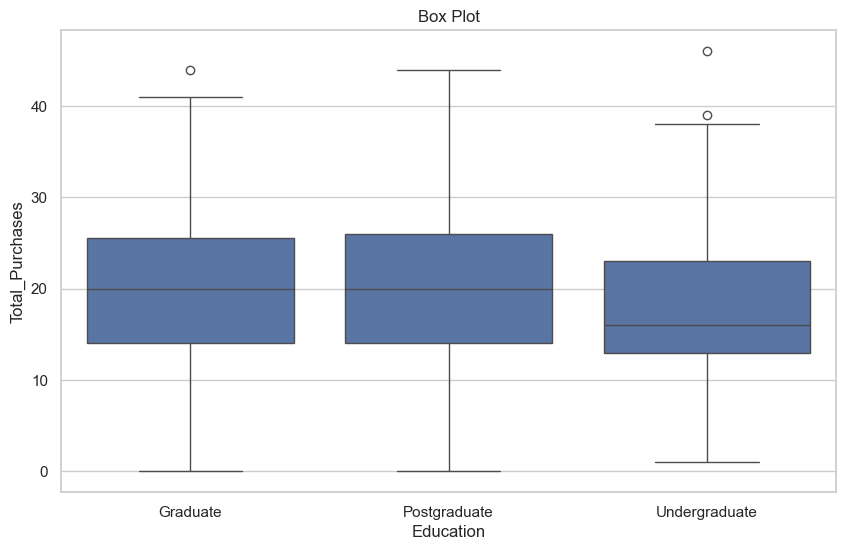

In [69]:
box_plot_categorical_numerical(data=df,categorical_column='Education',numerical_column='Total_Purchases')

In [70]:
purchases

['NumDealsPurchases',
 'NumWebPurchases',
 'NumCatalogPurchases',
 'NumStorePurchases']

In [71]:
df.columns

Index(['Education', 'Marital_Status', 'Income', 'Kidhome', 'Teenhome',
       'Dt_Customer', 'Recency', 'Wines', 'Fruits', 'Meat', 'Fish', 'Sweet',
       'Gold', 'DealsPurchases', 'Web', 'Catalog', 'Store', 'WebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
       'Age', 'Living_With', 'Total_Offsprings', 'Year', 'Month', 'Day',
       'Total_Expenditure', 'Living_With_Replaced', 'Family_Size',
       'Total_Purchases'],
      dtype='object')

In [72]:
purchases=['DealsPurchases',
 'Web',
 'Catalog',
 'Store']

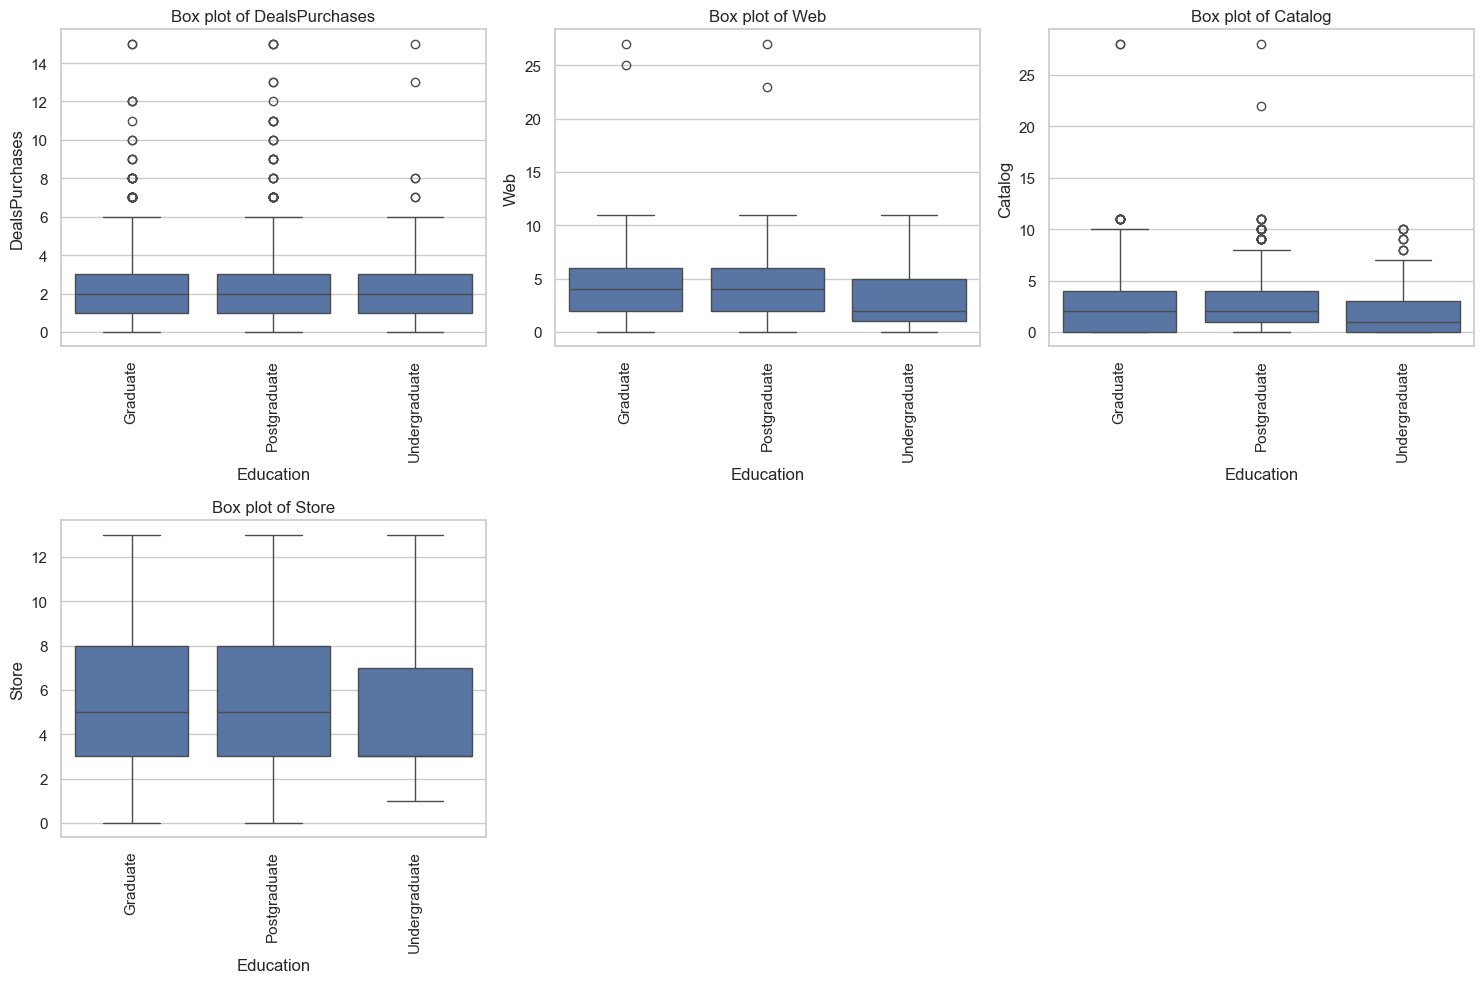

In [73]:
box_plot_by_category(data=df, category_column='Education', numerical_columns=purchases)

In [74]:
df.columns


Index(['Education', 'Marital_Status', 'Income', 'Kidhome', 'Teenhome',
       'Dt_Customer', 'Recency', 'Wines', 'Fruits', 'Meat', 'Fish', 'Sweet',
       'Gold', 'DealsPurchases', 'Web', 'Catalog', 'Store', 'WebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
       'Age', 'Living_With', 'Total_Offsprings', 'Year', 'Month', 'Day',
       'Total_Expenditure', 'Living_With_Replaced', 'Family_Size',
       'Total_Purchases'],
      dtype='object')

In [75]:
df=df.drop(columns=['Kidhome', 'Teenhome'])

In [76]:
df['Campaigns_Accepted'] = df[['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5']].sum(axis=1)

In [77]:
columns=[ 'Z_CostContact', 'Z_Revenue']
df=df.drop(columns=columns)

In [78]:
columns=[ 'AcceptedCmp3',
       'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2']

df=df.drop(columns=columns)

In [79]:
columns=['Dt_Customer','Year', 'Month', 'Day']
df=df.drop(columns=columns)

In [80]:
def replace_nan_with_median(dataframe, column_label):
    """
    Replace NaN values in a specified column with the median value of that column.

    Parameters:
    - dataframe: pandas DataFrame
    - column_label: str
        Label of the column with NaN values to be replaced.

    Returns:
    - pandas DataFrame with NaN values replaced by the median in the specified column.
    """
    # Calculate the median value of the specified column
    median_value = dataframe[column_label].median()

    # Replace NaN values with the median in the specified column
    dataframe[column_label].fillna(median_value, inplace=True)

    return dataframe

df=replace_nan_with_median(dataframe=df, column_label='Income')

In [81]:
df.columns

Index(['Education', 'Marital_Status', 'Income', 'Recency', 'Wines', 'Fruits',
       'Meat', 'Fish', 'Sweet', 'Gold', 'DealsPurchases', 'Web', 'Catalog',
       'Store', 'WebVisitsMonth', 'Complain', 'Response', 'Age', 'Living_With',
       'Total_Offsprings', 'Total_Expenditure', 'Living_With_Replaced',
       'Family_Size', 'Total_Purchases', 'Campaigns_Accepted'],
      dtype='object')

In [82]:
df.head()

,Education,Marital_Status,Income,Recency,Wines,Fruits,Meat,Fish,Sweet,Gold,...,Complain,Response,Age,Living_With,Total_Offsprings,Total_Expenditure,Living_With_Replaced,Family_Size,Total_Purchases,Campaigns_Accepted
0,Graduate,Single,58138.0,58,635,88,546,172,88,88,...,0,1,66,Alone,One Child,1617,1,1,32,0
1,Graduate,Single,46344.0,38,11,1,6,2,1,6,...,0,0,69,Alone,Three or More Children,27,1,3,11,0
2,Graduate,Together,71613.0,26,426,49,127,111,21,42,...,0,0,58,Partner,One Child,776,2,2,25,0
3,Graduate,Together,26646.0,26,11,4,20,10,3,5,...,0,0,39,Partner,Two Children,53,2,3,14,0
4,Postgraduate,Married,58293.0,94,173,43,118,46,27,15,...,0,0,42,Partner,Two Children,422,2,3,24,0


In [83]:
df=df.drop(columns=['Living_With_Replaced'])

In [84]:
df

,Education,Marital_Status,Income,Recency,Wines,Fruits,Meat,Fish,Sweet,Gold,...,WebVisitsMonth,Complain,Response,Age,Living_With,Total_Offsprings,Total_Expenditure,Family_Size,Total_Purchases,Campaigns_Accepted
0,Graduate,Single,58138.0,58,635,88,546,172,88,88,...,7,0,1,66,Alone,One Child,1617,1,32,0
1,Graduate,Single,46344.0,38,11,1,6,2,1,6,...,5,0,0,69,Alone,Three or More Children,27,3,11,0
2,Graduate,Together,71613.0,26,426,49,127,111,21,42,...,4,0,0,58,Partner,One Child,776,2,25,0
3,Graduate,Together,26646.0,26,11,4,20,10,3,5,...,6,0,0,39,Partner,Two Children,53,3,14,0
4,Postgraduate,Married,58293.0,94,173,43,118,46,27,15,...,5,0,0,42,Partner,Two Children,422,3,24,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,Graduate,Married,61223.0,46,709,43,182,42,118,247,...,5,0,0,56,Partner,Two Children,1341,3,23,0
2236,Postgraduate,Together,64014.0,56,406,0,30,0,0,8,...,7,0,0,77,Partner,Three or More Children,444,5,29,1
2237,Graduate,Divorced,56981.0,91,908,48,217,32,12,24,...,6,0,0,42,Alone,One Child,1241,1,25,1
2238,Postgraduate,Together,69245.0,8,428,30,214,80,30,61,...,3,0,0,67,Partner,Two Children,843,3,26,0


In [85]:
df

,Education,Marital_Status,Income,Recency,Wines,Fruits,Meat,Fish,Sweet,Gold,...,WebVisitsMonth,Complain,Response,Age,Living_With,Total_Offsprings,Total_Expenditure,Family_Size,Total_Purchases,Campaigns_Accepted
0,Graduate,Single,58138.0,58,635,88,546,172,88,88,...,7,0,1,66,Alone,One Child,1617,1,32,0
1,Graduate,Single,46344.0,38,11,1,6,2,1,6,...,5,0,0,69,Alone,Three or More Children,27,3,11,0
2,Graduate,Together,71613.0,26,426,49,127,111,21,42,...,4,0,0,58,Partner,One Child,776,2,25,0
3,Graduate,Together,26646.0,26,11,4,20,10,3,5,...,6,0,0,39,Partner,Two Children,53,3,14,0
4,Postgraduate,Married,58293.0,94,173,43,118,46,27,15,...,5,0,0,42,Partner,Two Children,422,3,24,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,Graduate,Married,61223.0,46,709,43,182,42,118,247,...,5,0,0,56,Partner,Two Children,1341,3,23,0
2236,Postgraduate,Together,64014.0,56,406,0,30,0,0,8,...,7,0,0,77,Partner,Three or More Children,444,5,29,1
2237,Graduate,Divorced,56981.0,91,908,48,217,32,12,24,...,6,0,0,42,Alone,One Child,1241,1,25,1
2238,Postgraduate,Together,69245.0,8,428,30,214,80,30,61,...,3,0,0,67,Partner,Two Children,843,3,26,0


In [110]:
def save_dataframe_to_csv(dataframe, folder_name, csv_name):
    """
    Save a DataFrame to a CSV file in the specified folder.

    Parameters:
    - dataframe: pandas DataFrame
    - folder_name: str, name of the folder to save the CSV file
    - csv_name: str, name of the CSV file

    Returns:
    - None
    """
    # Check if the folder exists, if not, create it
    if not os.path.exists(folder_name):
        os.makedirs(folder_name)

    # Construct the full path to the CSV file
    csv_path = os.path.join(folder_name, csv_name)

    # Save the DataFrame to CSV
    dataframe.to_csv(csv_path, index=False)
save_dataframe_to_csv(dataframe=df, folder_name="Transformed_Data", csv_name='EDA.csv')